In [1]:
import matplotlib.pyplot as plt
import numpy as np

import optimizer
import objective
import aquisition
import plot
import GPy
from distribution import Normal
from parameter import Space, Builder

/Users/pdt2/dev/stochastic-sampling-bayesian-optimization/simulations/optimizer.py:2: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg')


In [2]:
from importlib import reload

reload(optimizer)

 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/simulations/optimizer.py:2: UserWarning:matplotlib.pyplot as already been imported, this call will have no effect.


<module 'optimizer' from '/Users/pdt2/dev/stochastic-sampling-bayesian-optimization/simulations/optimizer.py'>

In [3]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.style.use('seaborn-colorblind')

 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning:
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning:
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning:
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.


In [4]:
%matplotlib inline

In [159]:
o = objective.Ackley(d=1)
# a = aquisition.MonteCarlo(T=100, total_variance=True, huber=True, delta=.1)
a = aquisition.MonteCarloUCB(T=100)

rng = o.range[0][1] - o.range[0][0]
# mu = Space(np.linspace(*o.range[0]))
lims = (o.range[0][0] + rng*.01, o.range[0][1] - rng*.01)
mu = Space(np.linspace(*lims))
std = Space(np.logspace(np.log10(.001*rng), np.log10(.1*rng), 7))
s = mu*std

b = Builder(mu*std)
b.register(Normal, [0, 1])

k = GPy.kern.RBF(1)
# k = GPy.kern.RBF(1) * GPy.kern.Cosine(1)
# k = GPy.kern.RBF(1) + GPy.kern.RBF(1)

opt = optimizer.Optimizer(o, b, a, model_resample=3)
opt.modeler.kernel = k
opt.modeler.noiseless = True

In [160]:
opt.optimize(100)

2018-12-13 14:15:20,627 - optimizer - INFO - iteration 0 start
2018-12-13 14:15:20,628 - optimizer - INFO - computing aquisitions
2018-12-13 14:15:20,631 - optimizer - INFO - selected pi([0.65536    1.41193032])
2018-12-13 14:15:20,632 - modeler - INFO - training model with 3 resamples
2018-12-13 14:15:20,637 - GP - INFO - initializing Y
2018-12-13 14:15:20,638 - GP - INFO - initializing inference method
2018-12-13 14:15:20,638 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:15:20,655 - GP - INFO - initializing Y
2018-12-13 14:15:20,656 - GP - INFO - initializing inference method
2018-12-13 14:15:20,656 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:15:20,675 - GP - INFO - initializing Y
2018-12-13 14:15:20,676 - GP - INFO - initializing inference method
2018-12-13 14:15:20,676 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:15:20,692 - modeler - INFO - finished training model
2018-12-13 14:15:20,693 - optimizer - IN

2018-12-13 14:15:32,523 - optimizer - INFO - computing aquisitions
2018-12-13 14:15:33,988 - optimizer - INFO - selected pi([5.89824  0.065536])
2018-12-13 14:15:33,989 - modeler - INFO - training model with 3 resamples
2018-12-13 14:15:33,993 - GP - INFO - initializing Y
2018-12-13 14:15:33,994 - GP - INFO - initializing inference method
2018-12-13 14:15:33,995 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:15:34,060 - GP - INFO - initializing Y
2018-12-13 14:15:34,061 - GP - INFO - initializing inference method
2018-12-13 14:15:34,061 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:15:34,100 - GP - INFO - initializing Y
2018-12-13 14:15:34,101 - GP - INFO - initializing inference method
2018-12-13 14:15:34,101 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:15:34,147 - modeler - INFO - finished training model
2018-12-13 14:15:34,148 - optimizer - INFO - iteration completed
2018-12-13 14:15:34,149 - optimizer - INFO

 /Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/GPy/kern/src/rbf.py:51: RuntimeWarning:overflow encountered in square


2018-12-13 14:15:40,413 - optimizer - INFO - selected pi([-0.65536   0.065536])
2018-12-13 14:15:40,414 - modeler - INFO - training model with 3 resamples
2018-12-13 14:15:40,418 - GP - INFO - initializing Y
2018-12-13 14:15:40,418 - GP - INFO - initializing inference method
2018-12-13 14:15:40,419 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:15:40,452 - GP - INFO - initializing Y
2018-12-13 14:15:40,453 - GP - INFO - initializing inference method
2018-12-13 14:15:40,453 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:15:40,519 - GP - INFO - initializing Y
2018-12-13 14:15:40,520 - GP - INFO - initializing inference method
2018-12-13 14:15:40,521 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:15:40,560 - modeler - INFO - finished training model
2018-12-13 14:15:40,561 - optimizer - INFO - iteration completed
2018-12-13 14:15:40,561 - optimizer - INFO - iteration 13 start
2018-12-13 14:15:40,562 - optimizer - INFO 

2018-12-13 14:15:53,928 - optimizer - INFO - selected pi([11.14112   0.065536])
2018-12-13 14:15:53,929 - modeler - INFO - training model with 3 resamples
2018-12-13 14:15:53,934 - GP - INFO - initializing Y
2018-12-13 14:15:53,934 - GP - INFO - initializing inference method
2018-12-13 14:15:53,935 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:15:53,994 - GP - INFO - initializing Y
2018-12-13 14:15:53,995 - GP - INFO - initializing inference method
2018-12-13 14:15:53,996 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:15:54,048 - GP - INFO - initializing Y
2018-12-13 14:15:54,049 - GP - INFO - initializing inference method
2018-12-13 14:15:54,050 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:15:54,083 - modeler - INFO - finished training model
2018-12-13 14:15:54,083 - optimizer - INFO - iteration completed
2018-12-13 14:15:54,084 - optimizer - INFO - iteration 21 start
2018-12-13 14:15:54,084 - optimizer - INFO 

2018-12-13 14:16:06,640 - optimizer - INFO - selected pi([-0.65536   0.065536])
2018-12-13 14:16:06,641 - modeler - INFO - training model with 3 resamples
2018-12-13 14:16:06,645 - GP - INFO - initializing Y
2018-12-13 14:16:06,645 - GP - INFO - initializing inference method
2018-12-13 14:16:06,646 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:16:06,685 - GP - INFO - initializing Y
2018-12-13 14:16:06,686 - GP - INFO - initializing inference method
2018-12-13 14:16:06,687 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:16:06,723 - GP - INFO - initializing Y
2018-12-13 14:16:06,724 - GP - INFO - initializing inference method
2018-12-13 14:16:06,725 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:16:06,758 - modeler - INFO - finished training model
2018-12-13 14:16:06,759 - optimizer - INFO - iteration completed
2018-12-13 14:16:06,759 - optimizer - INFO - iteration 29 start
2018-12-13 14:16:06,760 - optimizer - INFO 

2018-12-13 14:16:19,348 - optimizer - INFO - selected pi([-3.2768   0.65536])
2018-12-13 14:16:19,349 - modeler - INFO - training model with 3 resamples
2018-12-13 14:16:19,353 - GP - INFO - initializing Y
2018-12-13 14:16:19,354 - GP - INFO - initializing inference method
2018-12-13 14:16:19,355 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:16:19,386 - GP - INFO - initializing Y
2018-12-13 14:16:19,387 - GP - INFO - initializing inference method
2018-12-13 14:16:19,387 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:16:19,420 - GP - INFO - initializing Y
2018-12-13 14:16:19,421 - GP - INFO - initializing inference method
2018-12-13 14:16:19,421 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:16:19,482 - modeler - INFO - finished training model
2018-12-13 14:16:19,483 - optimizer - INFO - iteration completed
2018-12-13 14:16:19,484 - optimizer - INFO - iteration 37 start
2018-12-13 14:16:19,484 - optimizer - INFO - 

2018-12-13 14:16:32,335 - optimizer - INFO - selected pi([0.65536    0.30419117])
2018-12-13 14:16:32,336 - modeler - INFO - training model with 3 resamples
2018-12-13 14:16:32,340 - GP - INFO - initializing Y
2018-12-13 14:16:32,341 - GP - INFO - initializing inference method
2018-12-13 14:16:32,341 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:16:32,432 - GP - INFO - initializing Y
2018-12-13 14:16:32,433 - GP - INFO - initializing inference method
2018-12-13 14:16:32,434 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:16:32,466 - GP - INFO - initializing Y
2018-12-13 14:16:32,467 - GP - INFO - initializing inference method
2018-12-13 14:16:32,468 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:16:32,510 - modeler - INFO - finished training model
2018-12-13 14:16:32,511 - optimizer - INFO - iteration completed
2018-12-13 14:16:32,512 - optimizer - INFO - iteration 45 start
2018-12-13 14:16:32,512 - optimizer - INF

2018-12-13 14:16:45,486 - optimizer - INFO - selected pi([0.65536    0.30419117])
2018-12-13 14:16:45,487 - modeler - INFO - training model with 3 resamples
2018-12-13 14:16:45,491 - GP - INFO - initializing Y
2018-12-13 14:16:45,492 - GP - INFO - initializing inference method
2018-12-13 14:16:45,492 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:16:45,528 - GP - INFO - initializing Y
2018-12-13 14:16:45,529 - GP - INFO - initializing inference method
2018-12-13 14:16:45,530 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:16:45,608 - GP - INFO - initializing Y
2018-12-13 14:16:45,609 - GP - INFO - initializing inference method
2018-12-13 14:16:45,610 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:16:45,695 - modeler - INFO - finished training model
2018-12-13 14:16:45,695 - optimizer - INFO - iteration completed
2018-12-13 14:16:45,696 - optimizer - INFO - iteration 53 start
2018-12-13 14:16:45,697 - optimizer - INF

2018-12-13 14:16:58,879 - optimizer - INFO - selected pi([-0.65536     0.30419117])
2018-12-13 14:16:58,880 - modeler - INFO - training model with 3 resamples
2018-12-13 14:16:58,884 - GP - INFO - initializing Y
2018-12-13 14:16:58,885 - GP - INFO - initializing inference method
2018-12-13 14:16:58,886 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:16:58,973 - GP - INFO - initializing Y
2018-12-13 14:16:58,974 - GP - INFO - initializing inference method
2018-12-13 14:16:58,975 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:16:59,043 - GP - INFO - initializing Y
2018-12-13 14:16:59,044 - GP - INFO - initializing inference method
2018-12-13 14:16:59,044 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:16:59,089 - modeler - INFO - finished training model
2018-12-13 14:16:59,090 - optimizer - INFO - iteration completed
2018-12-13 14:16:59,091 - optimizer - INFO - iteration 61 start
2018-12-13 14:16:59,092 - optimizer - I

2018-12-13 14:17:12,945 - optimizer - INFO - selected pi([0.65536    0.30419117])
2018-12-13 14:17:12,946 - modeler - INFO - training model with 3 resamples
2018-12-13 14:17:12,950 - GP - INFO - initializing Y
2018-12-13 14:17:12,951 - GP - INFO - initializing inference method
2018-12-13 14:17:12,951 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:17:13,008 - GP - INFO - initializing Y
2018-12-13 14:17:13,009 - GP - INFO - initializing inference method
2018-12-13 14:17:13,010 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:17:13,066 - GP - INFO - initializing Y
2018-12-13 14:17:13,066 - GP - INFO - initializing inference method
2018-12-13 14:17:13,067 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:17:13,171 - modeler - INFO - finished training model
2018-12-13 14:17:13,172 - optimizer - INFO - iteration completed
2018-12-13 14:17:13,173 - optimizer - INFO - iteration 69 start
2018-12-13 14:17:13,174 - optimizer - INF

2018-12-13 14:17:26,971 - optimizer - INFO - selected pi([-0.65536     0.30419117])
2018-12-13 14:17:26,972 - modeler - INFO - training model with 3 resamples
2018-12-13 14:17:26,976 - GP - INFO - initializing Y
2018-12-13 14:17:26,977 - GP - INFO - initializing inference method
2018-12-13 14:17:26,977 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:17:27,059 - GP - INFO - initializing Y
2018-12-13 14:17:27,060 - GP - INFO - initializing inference method
2018-12-13 14:17:27,060 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:17:27,145 - GP - INFO - initializing Y
2018-12-13 14:17:27,146 - GP - INFO - initializing inference method
2018-12-13 14:17:27,147 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:17:27,223 - modeler - INFO - finished training model
2018-12-13 14:17:27,224 - optimizer - INFO - iteration completed
2018-12-13 14:17:27,224 - optimizer - INFO - iteration 77 start
2018-12-13 14:17:27,225 - optimizer - I

2018-12-13 14:17:41,233 - optimizer - INFO - selected pi([-0.65536  0.65536])
2018-12-13 14:17:41,233 - modeler - INFO - training model with 3 resamples
2018-12-13 14:17:41,237 - GP - INFO - initializing Y
2018-12-13 14:17:41,238 - GP - INFO - initializing inference method
2018-12-13 14:17:41,239 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:17:41,327 - GP - INFO - initializing Y
2018-12-13 14:17:41,328 - GP - INFO - initializing inference method
2018-12-13 14:17:41,328 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:17:41,368 - GP - INFO - initializing Y
2018-12-13 14:17:41,369 - GP - INFO - initializing inference method
2018-12-13 14:17:41,369 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:17:41,483 - modeler - INFO - finished training model
2018-12-13 14:17:41,484 - optimizer - INFO - iteration completed
2018-12-13 14:17:41,485 - optimizer - INFO - iteration 85 start
2018-12-13 14:17:41,485 - optimizer - INFO - 

2018-12-13 14:17:55,817 - optimizer - INFO - selected pi([-0.65536     0.30419117])
2018-12-13 14:17:55,818 - modeler - INFO - training model with 3 resamples
2018-12-13 14:17:55,822 - GP - INFO - initializing Y
2018-12-13 14:17:55,823 - GP - INFO - initializing inference method
2018-12-13 14:17:55,824 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:17:55,986 - GP - INFO - initializing Y
2018-12-13 14:17:55,986 - GP - INFO - initializing inference method
2018-12-13 14:17:55,987 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:17:56,083 - GP - INFO - initializing Y
2018-12-13 14:17:56,084 - GP - INFO - initializing inference method
2018-12-13 14:17:56,084 - GP - INFO - adding kernel and likelihood as parameters
2018-12-13 14:17:56,204 - modeler - INFO - finished training model
2018-12-13 14:17:56,205 - optimizer - INFO - iteration completed
2018-12-13 14:17:56,205 - optimizer - INFO - iteration 93 start
2018-12-13 14:17:56,206 - optimizer - I

In [161]:
mn = min(o.range[0][0], np.min(opt.modeler.transform(opt.model.X, reverse=True)))
mx = max(o.range[0][1], np.max(opt.modeler.transform(opt.model.X, reverse=True)))
x = np.linspace(mn, mx, 500)[:,None]

pmu, pvar = opt.model.predict(opt.modeler.transform(x)) 

In [162]:
reload(plot)
p = plot.AquisitionPlot(opt)

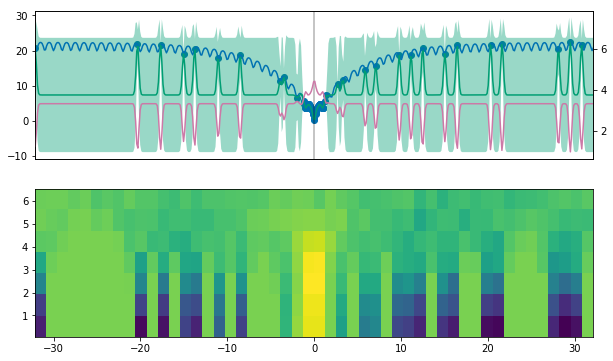

In [163]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 6))
ax1 = axes[0]
ax2 = axes[1]

ax1.plot(x, o.eval(x), label='objective'); 
ax1.scatter(opt.x, opt.y); 
plot.interval(pmu, pvar, x[:,0], .4, np.mean(opt.y), np.std(opt.y), ax=ax1);
ax1.axvline(o.optimum, c='k', alpha=.3)
# ax1.set_xlim(*o.range[0])


ax1t = ax1.twinx()
alpha = opt.aquisition.alpha(pmu, pvar, len(x), 250)
ax1t.plot(x, alpha, c='C3', label='aquisition')
ar = alpha.max() - alpha.min()
ax1t.set_xlim(*o.range[0])
ax1t.set_ylim(alpha.min() - .1*ar, alpha.max() + 1*ar)
ax1.set_xlim(*lims)
ax1.set_xticks([])

p = plot.AquisitionPlot(opt)
p.plot([ax2], 50)
# ax3.set_ylabel('std')

In [164]:
opt.model

GP_regression.,value,constraints,priors
rbf.variance,1.6770908799956978,+ve,
rbf.lengthscale,0.002354256151061722,+ve,
Gaussian_noise.variance,0.0,+ve fixed,


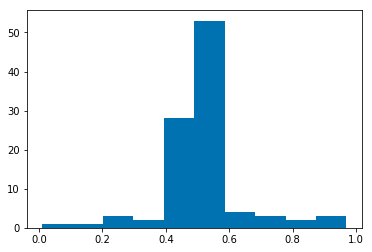

In [165]:
plt.hist(opt.model.X[:,0]);

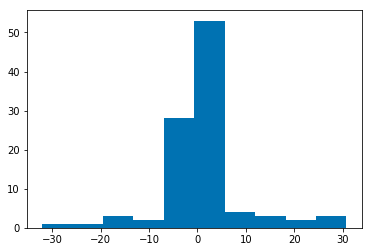

In [166]:
plt.hist(np.array(opt.x)[:,0]);

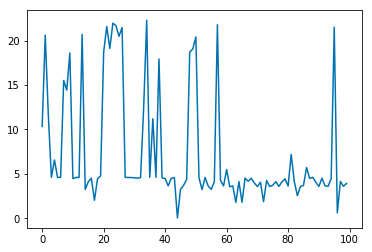

In [167]:
plt.plot(opt.regret());

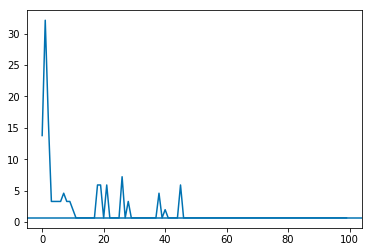

In [155]:
plt.plot(np.abs(opt.a)[:,0]);
plt.axhline(np.abs(mu.values).min())

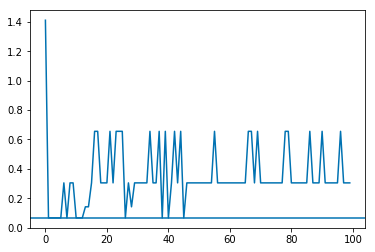

In [156]:
plt.plot(np.abs(opt.a)[:,1]);
plt.axhline(np.abs(std.values).min())

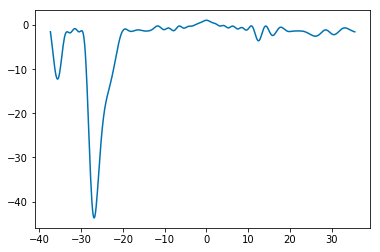

In [126]:
plt.plot(x, -pmu + np.sqrt(pvar))

In [97]:
from statsmodels.robust.scale import huber

In [98]:
import scipy

In [99]:
plt.figure(figsize=(12,4))
for ind in range(245, 250):
    print(opt.sampler.build(ind))
    mu, var = a._moments(opt.model, opt.modeler, opt.sampler.build(ind), True, 100)
    
    print(mu.mean(), mu.var(), var.mean(), var.var())
    #print(huber(mu), huber(var))
    print(a._compute(opt.model, opt.modeler, opt.sampler.build(ind), True, 100))
    #print(huber(mu)[0] + a.beta(100, 1) *np.sqrt(huber(mu)[1] + huber(var)[1]))

    plt.subplot(131)
    plt.hist(mu, alpha=.6)

    plt.subplot(132)
    plt.hist(var, alpha=.6)
    
    plt.subplot(133)
    z = np.linspace(-3, 2)
    plt.plot(z, scipy.stats.norm(mu.mean(), np.sqrt(mu.var() + var.mean())).pdf(z))
#     plt.axvline(mu.mean() + a.beta(100, 1) * np.sqrt(mu.var() + var.mean()))

[Normal(mu=490.0, std=10.0)]


AttributeError: 'MonteCarloUCB' object has no attribute '_moments'

<Figure size 864x288 with 0 Axes>

In [ ]:
plt.plot(a.beta(np.arange(0, 200), 1))
plt.plot(a.beta(np.arange(0, 200), 250))

In [ ]:
ind = 220
opt.sampler.build(ind)

In [154]:
mu, var = a._moments(opt.model, opt.modeler, opt.sampler.build(ind), True, 100)

In [155]:
mu.mean(), mu.var(), var.mean(), var.var()

(-0.41419451007053626,
 7.07044131142367e-08,
 2.73681463987252e-05,
 4.6510701155559545e-15)

In [156]:
a._compute(opt.model, opt.modeler, opt.sampler.build(ind), True, 100)

0.5398411640424211

In [158]:
huber(mu), huber(var)

((array(-0.41419022), array(0.00025584)),
 (array(2.73692222e-05), array(6.56263353e-08)))

(array([ 1.,  3.,  8., 18., 24., 24., 14.,  7.,  0.,  1.]),
 array([-0.41500513, -0.41483643, -0.41466773, -0.41449903, -0.41433033,
        -0.41416162, -0.41399292, -0.41382422, -0.41365552, -0.41348682,
        -0.41331812]),
 <a list of 10 Patch objects>)

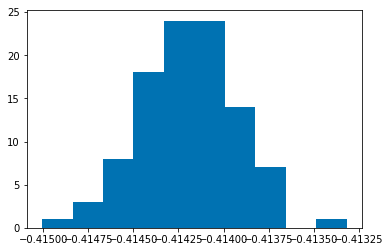

In [159]:
plt.hist(mu)

(array([ 1.,  3.,  8., 18., 24., 25., 13.,  7.,  0.,  1.]),
 array([2.71606562e-05, 2.72039358e-05, 2.72472154e-05, 2.72904950e-05,
        2.73337746e-05, 2.73770542e-05, 2.74203338e-05, 2.74636133e-05,
        2.75068929e-05, 2.75501725e-05, 2.75934521e-05]),
 <a list of 10 Patch objects>)

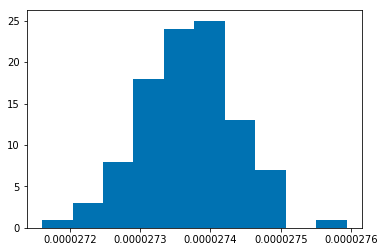

In [160]:
plt.hist(var)

In [106]:
opt.sampler.space.shape

(50, 5)

In [113]:
opt.sampler.space.values

array([[-3.27680000e+01,  1.00000000e-02],
       [-3.27680000e+01,  3.16227766e-02],
       [-3.27680000e+01,  1.00000000e-01],
       [-3.27680000e+01,  3.16227766e-01],
       [-3.27680000e+01,  1.00000000e+00],
       [-3.14305306e+01,  1.00000000e-02],
       [-3.14305306e+01,  3.16227766e-02],
       [-3.14305306e+01,  1.00000000e-01],
       [-3.14305306e+01,  3.16227766e-01],
       [-3.14305306e+01,  1.00000000e+00],
       [-3.00930612e+01,  1.00000000e-02],
       [-3.00930612e+01,  3.16227766e-02],
       [-3.00930612e+01,  1.00000000e-01],
       [-3.00930612e+01,  3.16227766e-01],
       [-3.00930612e+01,  1.00000000e+00],
       [-2.87555918e+01,  1.00000000e-02],
       [-2.87555918e+01,  3.16227766e-02],
       [-2.87555918e+01,  1.00000000e-01],
       [-2.87555918e+01,  3.16227766e-01],
       [-2.87555918e+01,  1.00000000e+00],
       [-2.74181224e+01,  1.00000000e-02],
       [-2.74181224e+01,  3.16227766e-02],
       [-2.74181224e+01,  1.00000000e-01],
       [-2.

In [123]:
opt.sampler.build(112)

[Normal(mu=-3.343673469387756, std=0.1)]

In [78]:
opt.model.kern

sum.,value,constraints,priors
rbf.variance,0.6620421738320201,+ve,
rbf.lengthscale,0.09174687333109265,+ve,
rbf_1.variance,0.07974800414487347,+ve,
rbf_1.lengthscale,0.027516471645714607,+ve,


In [79]:
opt.model

GP_regression.,value,constraints,priors
sum.rbf.variance,0.6620421738320201,+ve,
sum.rbf.lengthscale,0.09174687333109265,+ve,
sum.rbf_1.variance,0.07974800414487347,+ve,
sum.rbf_1.lengthscale,0.027516471645714607,+ve,
Gaussian_noise.variance,0.0,+ve fixed,


In [58]:
m = opt.modeler.build(opt.x, opt.y, resample=5)
m

2018-12-12 16:18:37,378 - modeler - INFO - training model with 5 resamples
2018-12-12 16:18:37,386 - GP - INFO - initializing Y
2018-12-12 16:18:37,387 - GP - INFO - initializing inference method
2018-12-12 16:18:37,388 - GP - INFO - adding kernel and likelihood as parameters
2018-12-12 16:18:37,490 - GP - INFO - initializing Y
2018-12-12 16:18:37,491 - GP - INFO - initializing inference method
2018-12-12 16:18:37,491 - GP - INFO - adding kernel and likelihood as parameters
2018-12-12 16:18:37,587 - GP - INFO - initializing Y
2018-12-12 16:18:37,588 - GP - INFO - initializing inference method
2018-12-12 16:18:37,589 - GP - INFO - adding kernel and likelihood as parameters
2018-12-12 16:18:37,673 - GP - INFO - initializing Y
2018-12-12 16:18:37,674 - GP - INFO - initializing inference method
2018-12-12 16:18:37,675 - GP - INFO - adding kernel and likelihood as parameters
2018-12-12 16:18:37,753 - GP - INFO - initializing Y
2018-12-12 16:18:37,754 - GP - INFO - initializing inference met

GP_regression.,value,constraints,priors
rbf.variance,0.48103273179764283,+ve,
rbf.lengthscale,0.23766838620851655,+ve,
Gaussian_noise.variance,0.0,+ve fixed,
